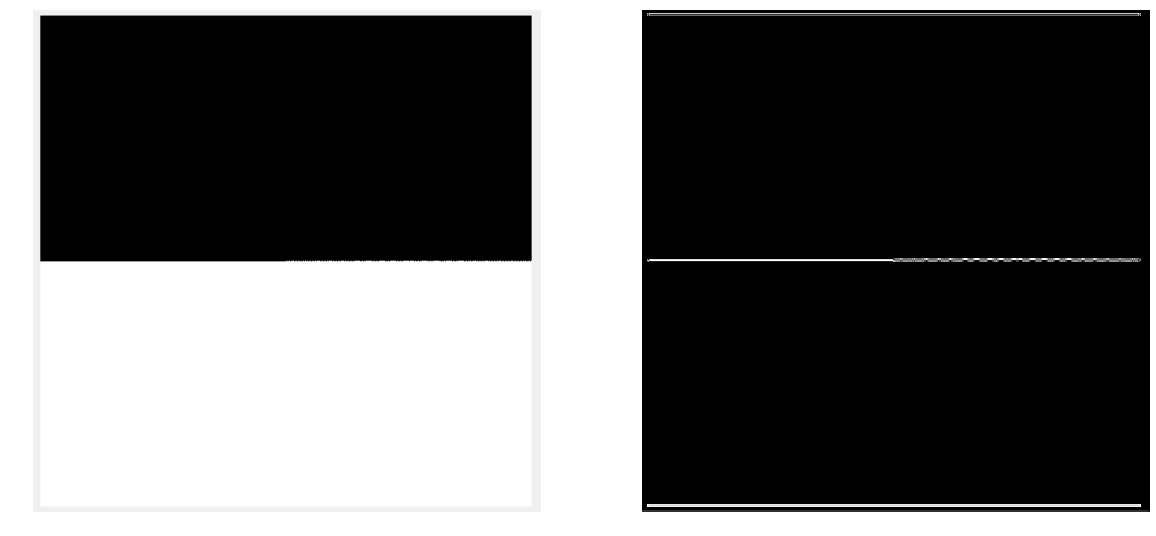

In [6]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageOps
import numpy as np


def convolve2d(image, kernel, k):
#     kernel = np.flipud(np.fliplr(kernel))    # Flip the kernel
    image = image.astype('float')
    kernel = np.array(kernel)
#     kernel = kernel.astype('float32')
    output = np.zeros_like(image)            # convolution output
    # Add zero padding to the input image
    
    image_padded = np.zeros((image.shape[0] + k, image.shape[1] + k))   
    image_padded[0:image.shape[0],0:image.shape[1]] = image
#     image_padded[1:-1, 1:-1] = image
    for x in range(image.shape[1]):     # Loop over every pixel of the image
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y,x]=(kernel*image_padded[y:y+k,x:x+k]).sum()        
    return output

def convolve3d(image,kernel,k):
    ans = np.zeros(image.shape)
    ans[:,:,0] = convolve2d(image[:,:,0],kernel,k)
    ans[:,:,1] = convolve2d(image[:,:,1],kernel,k)
    ans[:,:,2] = convolve2d(image[:,:,2],kernel,k)
    return ans

# convmat = [[-1,0,1],[-1,0,1],[-1,0,1]]
convmat = [[-1,-1,-1],[0,0,0],[1,1,1]]
convmat = np.array(convmat)


H_r = np.array([-1, 0, 1])

H_c = np.transpose(np.array([0, 1, 0]))

# img = Image.open('box.png').convert('L')
img = cv2.imread('../input/box.png', 0)
img = np.array(img)
# w, h = img.shape
# # img1 = np.convolve(img.flatten, convmat.flatten)
# # img1 = np.reshape(img1, img.shape)
# ans = np.zeros((w, h))
# for i in range(w):
#     ans[i, :] = np.convolve(img[i,:], H_r,'same')
# for i in range(h):
#     ans[:, i] += np.convolve(img[:,i], H_c,'same')

# print(img.shape)
# ans = filter(img, convmat)
# ans = ans
ans = convolve2d(img, convmat, 3)
ans = ans.astype('uint8')
# print(ans.shape)
# ans1 = convolve2d(img, convmat)

fig = plt.figure(figsize=[20, 20])
plt.subplot(1,2,1);plt.imshow(img, cmap='gray');plt.axis('off')
plt.subplot(1,2,2);plt.imshow(ans, cmap='gray');plt.axis('off')
plt.show()


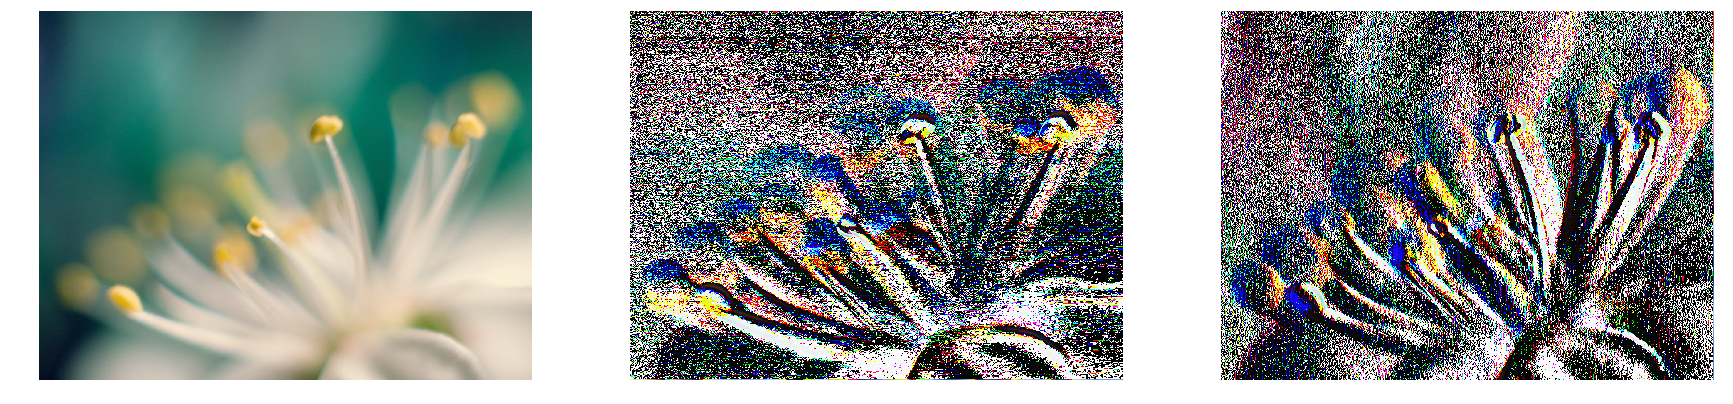

In [3]:
# img = Image.open('blur.jpg').convert('L')
img = cv2.imread('../input/blur.jpg',-1)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = np.array(img)
transpose = np.transpose(convmat)
transpose = np.array(transpose)

ans1 = convolve3d(img, transpose, 3)
ans = convolve3d(img, convmat, 3)

fig = plt.figure(figsize=[30, 30])
plt.subplot(1,3,1);plt.imshow(img);plt.axis('off')
plt.subplot(1,3,2);plt.imshow(ans.astype('uint8'));plt.axis('off')
plt.subplot(1,3,3);plt.imshow(ans1.astype('uint8'));plt.axis('off')
plt.show()



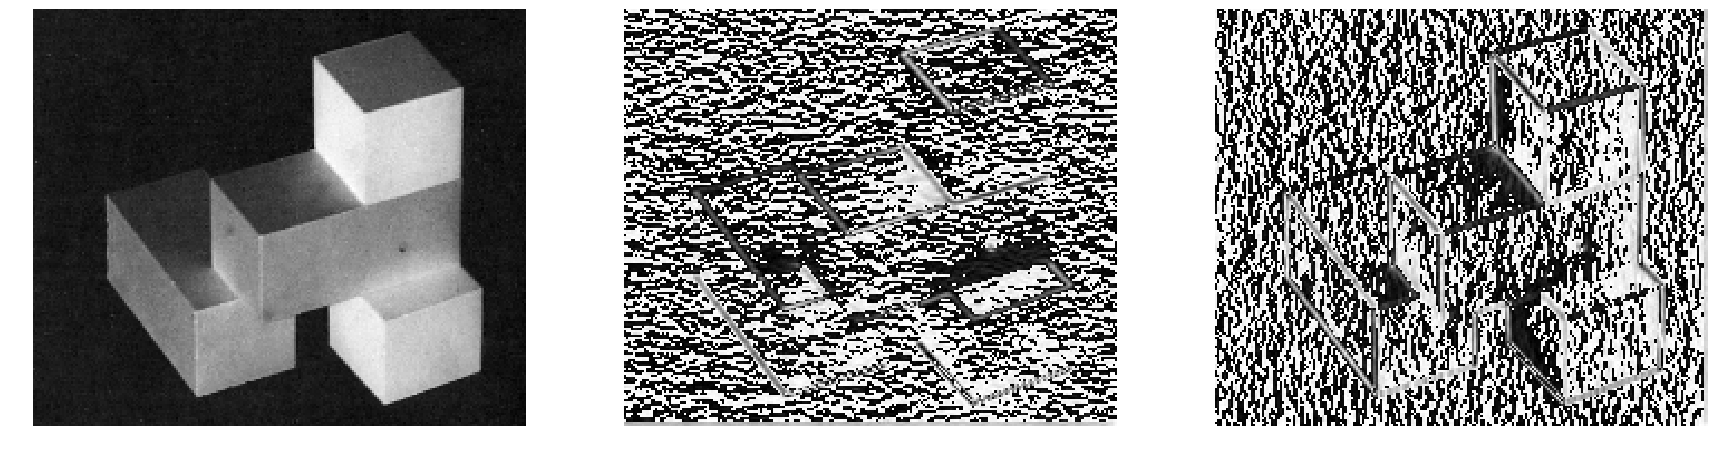

In [7]:
# img = Image.open('cubes.png').convert('L')
img = cv2.imread('../input/cubes.png',0)
img = np.array(img)
transpose = np.transpose(convmat)
transpose = np.array(transpose)

ans1 = convolve2d(img, transpose, 3)
ans = convolve2d(img, convmat, 3)

fig = plt.figure(figsize=[30, 30])
plt.subplot(1,3,1);plt.imshow(img, cmap='gray');plt.axis('off')
plt.subplot(1,3,2);plt.imshow(ans.astype('uint8'), cmap='gray');plt.axis('off')
plt.subplot(1,3,3);plt.imshow(ans1.astype('uint8'), cmap='gray');plt.axis('off')
plt.show()


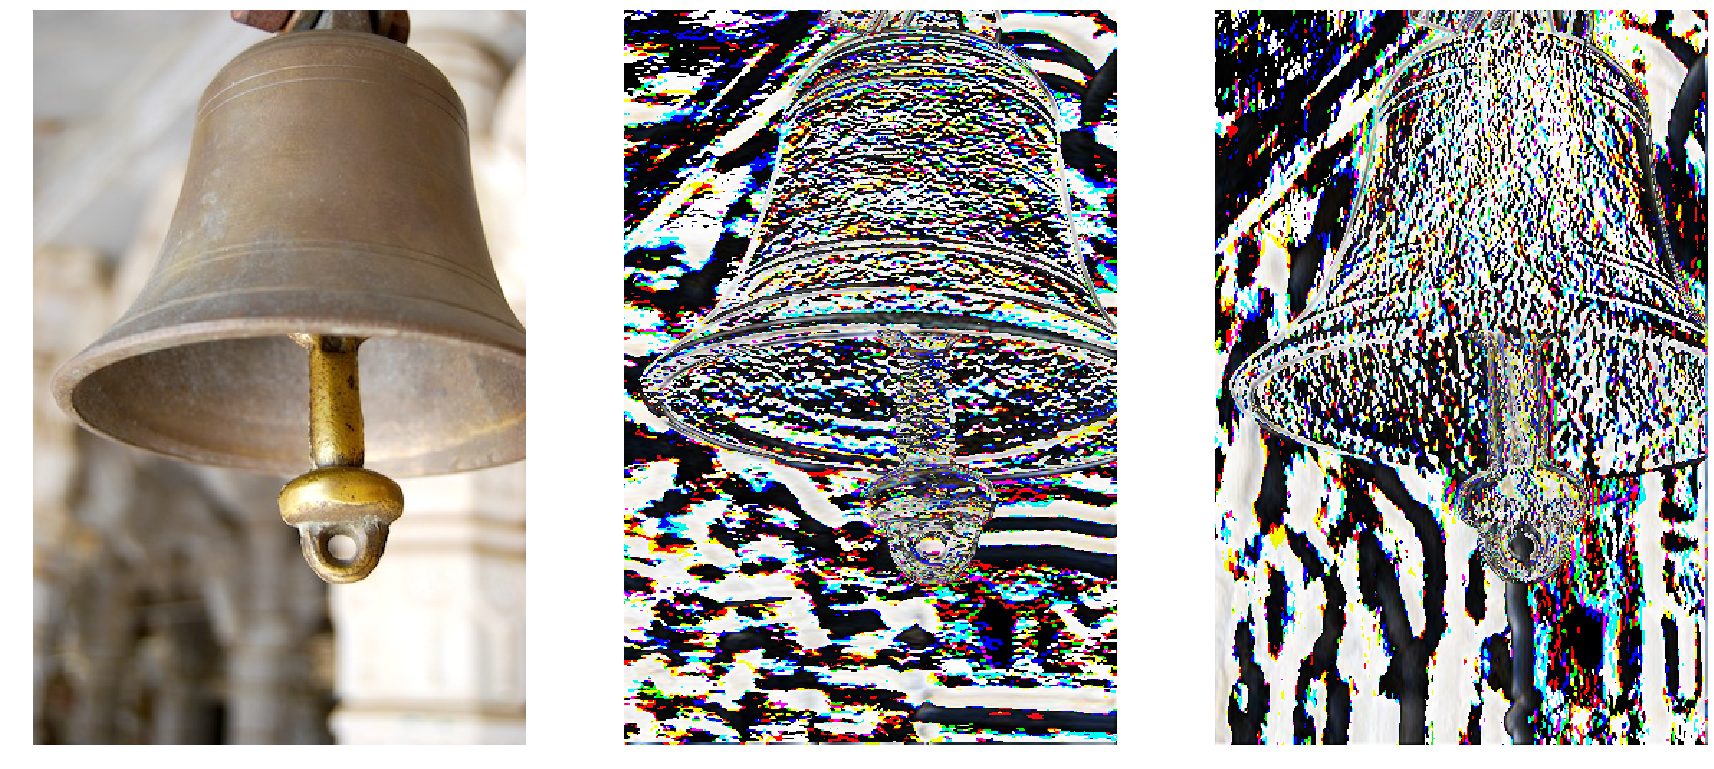

In [8]:
# img = Image.open('bell.jpg').convert('L')
img = cv2.imread('../input/bell.jpg',-1)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = np.array(img)
transpose = np.transpose(convmat)
transpose = np.array(transpose)

ans1 = convolve3d(img, transpose, 3)
ans = convolve3d(img, convmat, 3)

fig = plt.figure(figsize=[30, 30])
plt.subplot(1,3,1);plt.imshow(img);plt.axis('off')
plt.subplot(1,3,2);plt.imshow(ans.astype('uint8'));plt.axis('off')
plt.subplot(1,3,3);plt.imshow(ans1.astype('uint8'));plt.axis('off')
plt.show()
